In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data set
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression

In [5]:
#loading the linear regression library
from sklearn.linear_model import LinearRegression

#create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we created a linear regression object, we would want to find out how highway mpg of a car can predict the car's price. To do this we would create a new variables X and Y, where X will be the predictor variable (which in this case is highway-mpg) and Y will be target variable (i.e. price). 

Next, we will train the model using the new values of X and Y using the lm.fit() method.

In [9]:
#create X and Y variables 
X = df[['highway-mpg']]
Y = df['price']

In [10]:
#lets feed X to the regression object we created
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# we can now predict the new value of Y (Yhat) 
#with the value of X
Yhat =lm.predict(X)
Yhat[0:5] #we want to take a look at the first 5 entries

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [17]:
#our simple linear model will look like this Yhat = a + bX;
#where a=the intercept; b=the slope

#lets now derrive the value of the intercept(a)
lm.intercept_

38423.305858157415

In [18]:
#lets derrive value for the slope(b)
lm.coef_

array([-821.73337832])

So now we have our linear model to predict the price taking values from highway-mpg. 

$$ Yhat = a + bX $$

Final model will have the structure:

$$ Price = 38423.31 - 821.73 x highway_mpg $$

Now let's repeat the same process for car engine-size and price, where engine-size is the predictor variable and price the target variable.

#### Create Linear Object

In [23]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#assigning variables to X and Y
X1 = df[['engine-size']]
Y1 = df['price']

#### Fitting the Model

In [29]:
# now lets fit the model with X (engine size)
lm1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediting Y by feeding X to linear model

In [30]:
#Let's now predict the value of Y, i.e. Yhat
Yhat = lm1.predict(X1)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

#### Coefficient or Slope of X

In [26]:
#lets derrive the slope (coef)
lm1.coef_

array([166.86001569])

#### Intercept of linear model

In [27]:
#lets find the intercept
lm1.intercept_

-7963.338906281042

Final line of prediction is:
$$ 
Yhat = 166.86*X1 - 7963.34
$$ 

or
$$
Price = 166.86 * engine-size - 7963.34
$$

#### Multiple Linear Regression

Here, we would want to look at 4 different car features as the predictor variables for the model to predict car price. We would want to us;
**Horsepower, Curb-weight, Engine-size and Highway-mpg**

This will give us a prediction line as follows:
$$ Yhat = a +b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

where;
$$ 
a = intercept
b_1 = coefficients \ of\ Variable \ 1\\
b_2 = coefficients \ of\ Variable \ 2\\
b_3 = coefficients \ of\ Variable \ 3\\
b_4 = coefficients \ of\ Variable \ 4\\
$$

$$
Y: Response \ Variable\\
X_1 = Predictor\ Variable \ 1,\ i.e. horsepower\\
X_2 = Predictor\ Variable \ 2,\ i.e. curb-weight\\
X_3 = Predictor\ Variable \ 3,\ i.e. engine-size\\
X_4 = Predictor\ Variable \ 4,\ i.e. highway-mpg\\
$$

Now, let's develop the model using these four variables.

In [33]:
#first lets create a new linear regression object, lm2
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#lets extract the values of predictors and store them in Z
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [34]:
# now let's fit the model with Z, by price
lm2.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#lets generate the intercept (a)
lm2.intercept_

-15806.624626329234

In [36]:
#lets get the slopes or coefficients for each predictor
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, our prediction line was:
$$ Yhat = a +b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

Thus we get a linear function prediction price as follows:

$$ Price = -15806.62 + 53.50 * horsepower + 4.71 * curb weight + 81.53 * engine size + 36.06 * highway mpg $$

### Model Evaluation

Now that we have developed some models, let's evaluate our models.

first we need to import the visualization package, seaborn.

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

**Regression Plots**

Our first model took in highway-mpg to predict price. Lets see the robustness of the model using a regplot.

Text(0.5, 0, 'Highway Miles Per Gallon')

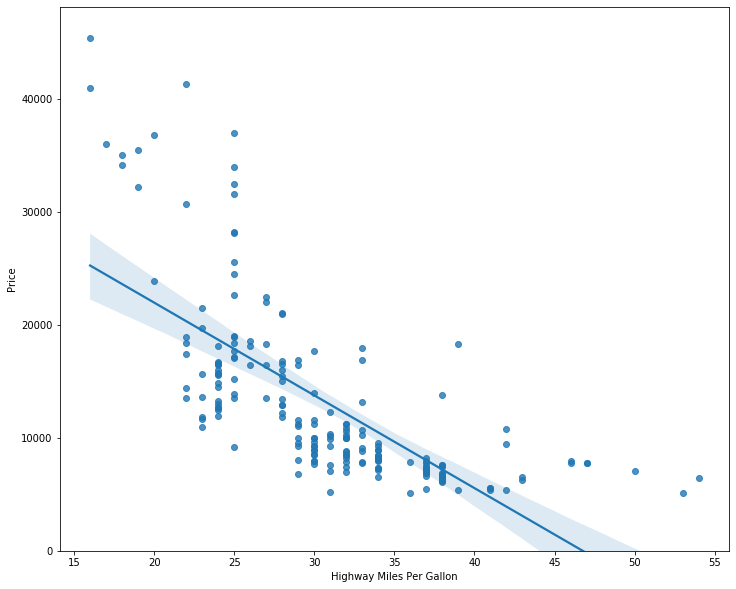

In [41]:
plt.figure(figsize = (12, 10)) #specify plot dimensions
sns.regplot(data = df, x='highway-mpg', y='price')
plt.ylim(0,)
plt.ylabel('Price')
plt.xlabel('Highway Miles Per Gallon')

We see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. 

This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. 

Let's compare this plot to the regression plot of "peak-rpm"

(0, 47414.10667770421)

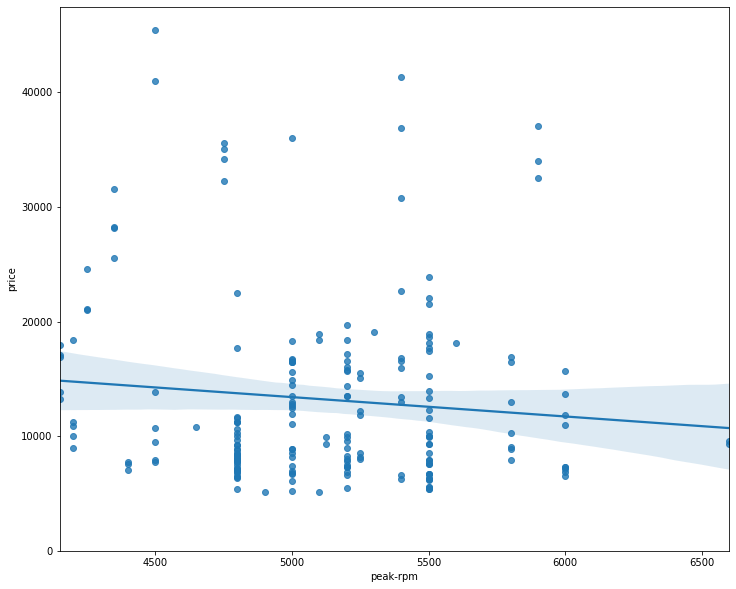

In [40]:
plt.figure(figsize=(12, 10))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" are more scattered around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

However, is that the case? Lets check if indeed highway-mpg has stronger correlation with price than preak-rpm, as shown in the plots above. 

In [42]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The verification shows us something quite different. The variable "peak-rpm" seems to have a stronger negative correlation with "price", it is approximately -0.704692  compared to   "highway-mpg" which is approximately -0.058598.

#### Residual Plots

Let's now visualize the variance of our data using a residual plot.

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

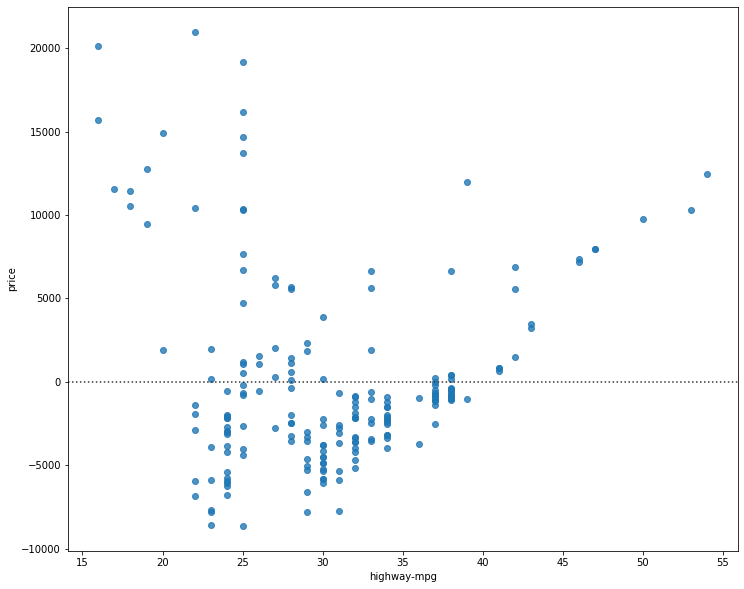

In [43]:
#first lets look at our first model, highway-mpg and price
plt.figure(figsize = (12, 10))
sns.residplot(df['highway-mpg'], df['price'])

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which perhaps means that maybe a non-linear model is more appropriate for this data instead of a linear regression model.</p>

#### Distribution Plots (Multiple Linear Regression)

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

To begin, let's make prediction of Yhat for our Z-model above (lm2).

In [44]:
Y_hat = lm2.predict(Z)
Y_hat[:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

Now let's plot a distribution plot and see how the fitted values and actual values are distributed.

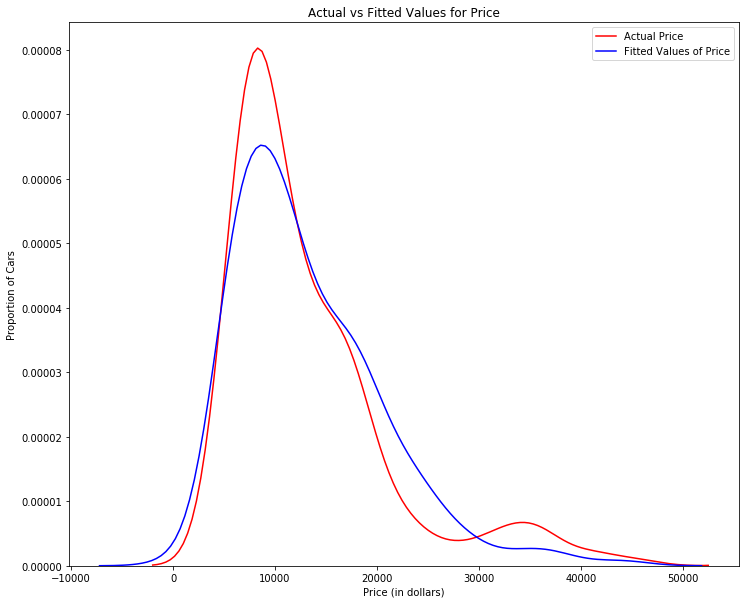

In [50]:
plt.figure(figsize = (12, 10))

#plotting distribution of the original values of price
ax1=sns.distplot(df['price'], hist=False, color='r', label='Actual Price')

#now lets plot predicted values of price calculated as Y_hat above
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values of Price')

#lets label the figure
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

#lets show and close plot
plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

## Polynomial regression and pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

<p>As we saw earlier a linear model using highway-mpg as a predictor did not provide the best fit. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [52]:
# we do this by defining a function as below
def Plotpolly(model, independent_var, dependent_var, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_var, dependent_var, '.', x_new, y_new,'-' )
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [54]:
#noe lets fetch the variables into x and y
x =df['highway-mpg']
y =df['price']

In [61]:
#now lets fit the polynomial model usingthe numpy polyfit func
#and use the poly1d method to display the fitted polynomial function

#fitting the polynomial, store it as f. We use 3 as 3rd arg 
#because we want to use a 3rd order polynomial regression
f = np.polyfit(x,y,3)

#next lets display the function using poly1d() and store as p
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


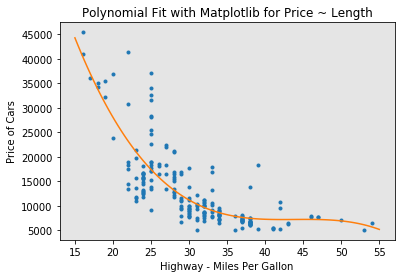

In [62]:
#now lets plot the polynomial regression results using the 
#Plotpolly function we created earlier.

Plotpolly(p, x, y, 'Highway - Miles Per Gallon')

In [63]:
#now lets confirm the coefficients
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


Lets see how a 2-order polynomial regression function would look like.

In [67]:
#fitting the polynomial, store it as f. We use 3 as 3rd arg 
#because we want to use a 3rd order polynomial regression
f1 = np.polyfit(x,y,2)

#next lets display the function using poly1d() and store as p
p1 = np.poly1d(f1)
print(p1)

       2
45.35 x - 3773 x + 8.419e+04


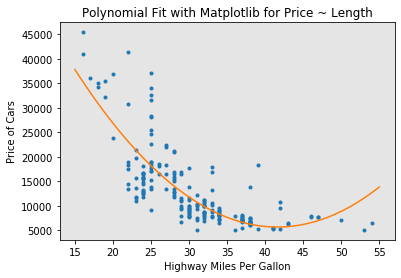

In [69]:
Plotpolly(p1, x, y, 'Highway Miles Per Gallon')

### Multivariate Polynomial Functions

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

We can perform a polynomial transform on multiple features (variables) using the PolynomialFeatures module.

In [70]:
#first lets import the module
from sklearn.preprocessing import PolynomialFeatures

In [73]:
#next we create polynomial regression object, 
#just like we did for linear models earlier

#we create PolynomialFeatures Object of 2 degree order
pr =PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [74]:
#now lets transform the data
Z_pr = pr.fit_transform(Z)

In [75]:
#the original data had 201 samples and 4 features
Z.shape

(201, 4)

In [76]:
#but after transforming, we now have more features
Z_pr.shape

(201, 15)

### PIpeline

Data Pipelines help us to simplify the processing and transformation of data. To create a Pipeline, we will use the Pipeline Module and StandardScaler modules in sklearn.

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

First, to create a pipeline, we would need to create a list of tuples and use the list as argument in the Pipeline function.

In [78]:
#create input - list of tuples
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [79]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Now we can normalize and tranform the data while fitting the data into the model simultaneously.

In [81]:
pipe.fit(Z, y) #y = df['price']

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [84]:
ypipe = pipe.predict(Z)
ypipe[:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Evaluting Models - R^2 and Mean Squared Error


Let's now calculate the R^2 and MSE for the three models we have developed above.

### Model 1: Simple Linear Regression

In [102]:
X = df[['highway-mpg']]
Y = df['price']

In [103]:
#using the highway-mpg fit model
lm.fit(df[['highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
#lets calculate the R squared
print('The R-square for Model 1 is:', lm.score(df[['highway-mpg']], df['price']))

The R-square for Model 1 is: 0.4965911884339176


The R-square shows that ~ 49.659% of the variation of the price is explained by this simple linear model "highway-mpg" fit.


Now lets calculate the Mean Square Error

In [105]:
#first lets predict the output (Yhat) using the predict method
Yhat = lm.predict(X)
Yhat[:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [98]:
#now lets import the functions to calculate MSE
from sklearn.metrics import mean_squared_error

In [106]:
#now lets use the function to compare the predicted and actual results
mse = mean_squared_error(Y, Yhat)
print('Mean squared error of prince and predicted value is:', mse)

Mean squared error of prince and predicted value is: 31635042.944639888


### Model 2: Multipile Linear Regression

R^2

In [107]:
#using the model with variables in Z
lm.fit(Z, df['price'])
print('R squared is:', lm.score(Z, df['price']))

R squared is: 0.8093562806577457


This model gives a better prediction and explanation of the price of cars. An R square of ~ 80.896% means that the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

In [111]:
#first we produce a prediction
Y_predict_multifit = lm.predict(Z)

In [114]:
mse1 = mean_squared_error(df['price'], Y_predict_multifit)
mse1

11980366.87072649

In [117]:
print('MeanSquaredError of Price and Predicted Value Using Multifit is:', mse1)

MeanSquaredError of Price and Predicted Value Using Multifit is: 11980366.87072649


### Model 3 - Polynomial Fit


R^2

First, let’s import the function r2_score from the module metrics as we are using a different function.

In [118]:
from sklearn.metrics import r2_score

In [119]:
rsquared = r2_score(y, p(x))
print('Rsquared is:', rsquared)

Rsquared is: 0.674194666390652


This means that we can say ~ 67.419% of the variation of price is explained by this polynomial fit.


Let's calculate the MSE for the polynomial fit

In [120]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

In [122]:
#first, we need to create an input
new_input = np.arange(1, 100, 1).reshape(-1,1)

In [123]:
#lets fit the model
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
#lets use the new_input to create the prediction
yhat = lm.predict(new_input)
yhat[:3]

array([37601.57247984, 36779.83910151, 35958.10572319])

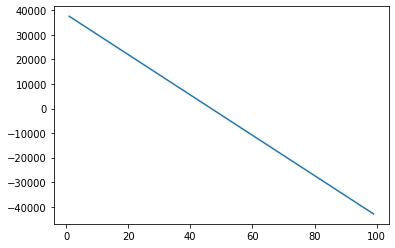

In [125]:
#now let's plot the data
plt.plot(new_input, yhat)

### Decision Making

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>